In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import yfinance as yf

In [2]:
msft = yf.Ticker("MSFT")
#msft.info
#print(dir(msft))

In [13]:
def plot_chart(stock_object, period, kind='interactive'):
    
    period_list = ['1d','5d','1mo','3mo','6mo','1y','2y','5y','10y','ytd','max']
    if period not in period_list:
        raise KeyError("Incorrect period specified. Allowed list: "
                       "['1d','5d','1mo','3mo','6mo','1y','2y','5y','10y','ytd','max']")
    
    data = stock_object.history(period=period)
    plot_title = 'Stock: {}, Time Period: {}'.format(stock_object.ticker, period)
    
        
    fig = go.Figure(
        data=go.Scatter(y=data['Close'],
                        x=data.index,
                        line=dict(color='chartreuse', width=4)
                       ),

    )

    fig.add_layout_image(
        dict(
            source=stock_object.info['logo_url'],
            xref="paper", yref="paper",
            x=1, y=1.05,
            sizex=0.2, sizey=0.2,
            xanchor="left", yanchor="bottom"
        )
    )

    fig.update_layout(title=plot_title,
                      xaxis_title='Date',
                      yaxis_title='Closing Price',
                      template = 'plotly_dark',
                      xaxis_showgrid=False, 
                      yaxis_showgrid=False
                     )
    
    if kind == 'interactive':
        fig.show()
    if kind == 'static':
        fig.show("png")
        
    #if kind == 'static':
        

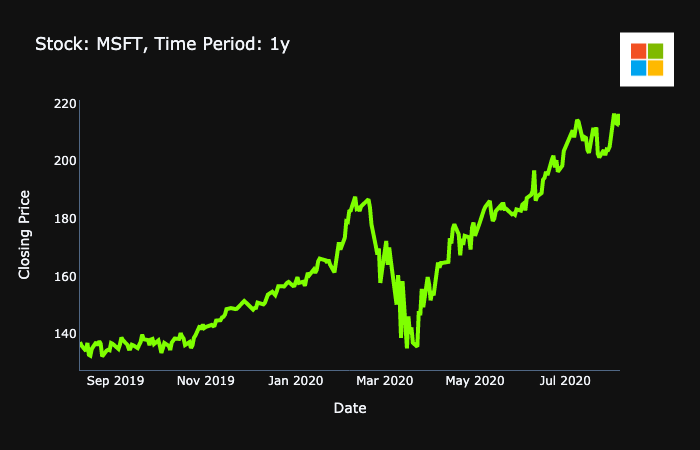

In [14]:
plot_chart(msft, '1y', kind='static')

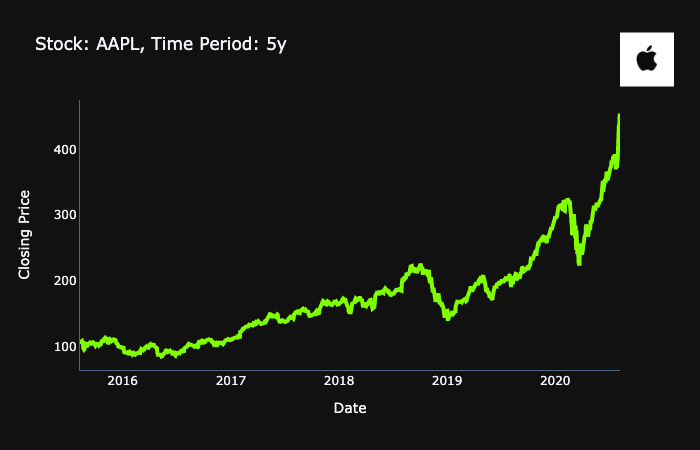

In [15]:
aapl = yf.Ticker("AAPL")
plot_chart(aapl, '5y', kind='static')

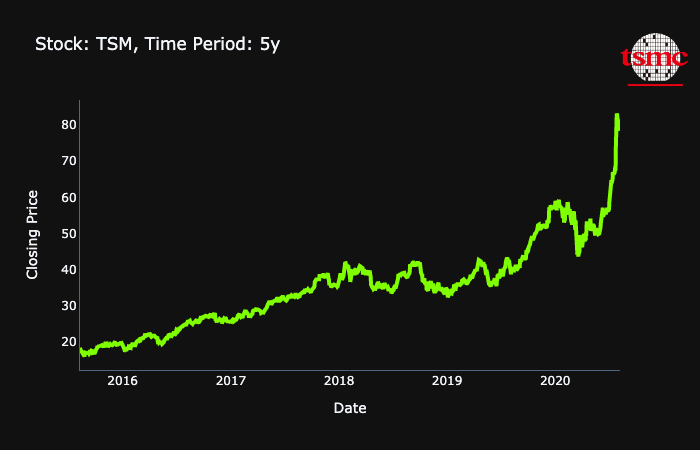

In [16]:
plot_chart(yf.Ticker("TSM"), '5y', kind='static')

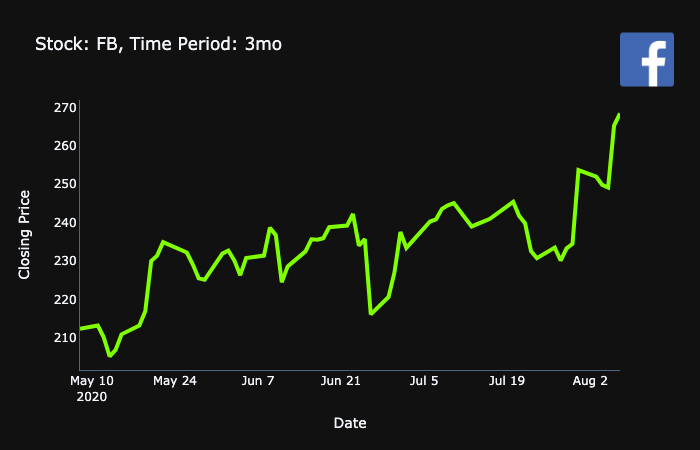

In [17]:
plot_chart(yf.Ticker("FB"), '3mo', kind='static')